# Pandas I

### 0. Připravte si data

1. Stáhněte si soubor https://datahub.io/sports-data/english-premier-league/r/season-1819.csv
1. Umístěte jej do složky data

### 1. Načtěte data set `season-1819_csv.csv` a provedte následující úpravy:

1. načtěte pouze prvních 17 sloupců
1. zahoďte sloupce Div, FTR a HTR
1. sloupec Date převeďte na datetime
1. přejmenujte sloupce:
    - FTHG: FullTimeHomeGoals
    - FTAG: FullTimeAwayGoals
    * HTHG: HalfTimeHomeGoals
    * HTAG: HalfTimeAwayGoals
    * HS: HomeShots
    * AS: AwayShots
    * HST: HomeShotsTarget
    * AST: AwayShotsTarget
    * HF: HomeFauls
    * AF: AwayFauls

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [13]:
DATA_FOLDER = 'data'
DATA_SET = 'season-1819_csv.csv'



In [14]:
d = pd.read_csv("https://datahub.io/sports-data/english-premier-league/r/season-1819.csv")
d = d.rename(columns={"FTHG": "FullTimeHomeGoals", "FTAG": "FullTimeAwayGoals", "HTHG": "HalfTimeHomeGoals", "HTAG": "HalfTimeAwayGoals", "HS":"HomeShots", "AS": "AwayShots", "HST": "HomeShotsTarget", "AST": "AwayShotsTarget", "HF": "HomeFauls", "AF": "AwayFauls" })

In [15]:
d = d.iloc[:, :17]
d.head()
df = d.drop(["Div", "FTR", "HTR"], axis=1)

df['Date']= pd.to_datetime(df['Date'])
df.head()

,Date,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls
0,2018-10-08,Man United,Leicester,2,1,1,0,A Marriner,8,13,6,4,11,8
1,2018-11-08,Bournemouth,Cardiff,2,0,1,0,K Friend,12,10,4,1,11,9
2,2018-11-08,Fulham,Crystal Palace,0,2,0,1,M Dean,15,10,6,9,9,11
3,2018-11-08,Huddersfield,Chelsea,0,3,0,2,C Kavanagh,6,13,1,4,9,8
4,2018-11-08,Newcastle,Tottenham,1,2,1,2,M Atkinson,15,15,2,5,11,12


### 2. Zjistěte jaké datové typy mají všechny sloupečky, zda data set obsahuje nějaké NaN hodnoty a jaké jsou základní statistiky číselných sloupců.

In [16]:
df.info()
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
Date                 380 non-null datetime64[ns]
HomeTeam             380 non-null object
AwayTeam             380 non-null object
FullTimeHomeGoals    380 non-null int64
FullTimeAwayGoals    380 non-null int64
HalfTimeHomeGoals    380 non-null int64
HalfTimeAwayGoals    380 non-null int64
Referee              380 non-null object
HomeShots            380 non-null int64
AwayShots            380 non-null int64
HomeShotsTarget      380 non-null int64
AwayShotsTarget      380 non-null int64
HomeFauls            380 non-null int64
AwayFauls            380 non-null int64
dtypes: datetime64[ns](1), int64(10), object(3)
memory usage: 41.7+ KB


False

In [17]:
df.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsTarget,AwayShotsTarget,HomeFauls,AwayFauls
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000


In [18]:
# TODO: Implement your solution.

### 3. Zjistěte kolik různých týmů hraje anglickou ligu? Jaké týmy to jsou?

In [19]:
import numpy as np

joined = pd.unique(df["HomeTeam"]) + pd.unique(df["HomeTeam"])
teams = pd.unique(joined)
display(teams)
len(teams)

array(['Man UnitedMan United', 'BournemouthBournemouth', 'FulhamFulham',
       'HuddersfieldHuddersfield', 'NewcastleNewcastle', 'WatfordWatford',
       'WolvesWolves', 'ArsenalArsenal', 'LiverpoolLiverpool',
       'SouthamptonSouthampton', 'CardiffCardiff', 'ChelseaChelsea',
       'EvertonEverton', 'LeicesterLeicester', 'TottenhamTottenham',
       'West HamWest Ham', 'BrightonBrighton', 'BurnleyBurnley',
       'Man CityMan City', 'Crystal PalaceCrystal Palace'], dtype=object)

20

In [20]:
# TODO: Implement your solution.

In [21]:
# TODO: Implement your solution.

### 4. Přidejte sloupečky `HomeShotAccuracy` a `AwayShotAccuracy`, které říkají jaké procento střeleckých pokusů (Shots) nakonec mířilo na bránu (ShotsTarget). Vizualizujte rozdělení hodnot obou sloupců.

In [22]:
plt.rcParams['figure.figsize'] = (24, 6)  # redefine the default size of the plots
plt.style.use('ggplot')  # redefine default color scheme



In [23]:
matches = df.copy()

In [24]:
matches.head()
matches["HomeShotAccuracy"] = matches["HomeShotsTarget"] /  matches["HomeShots"]
matches["AwayShotAccuracy"] = matches["AwayShotsTarget"] /  matches["AwayShots"]

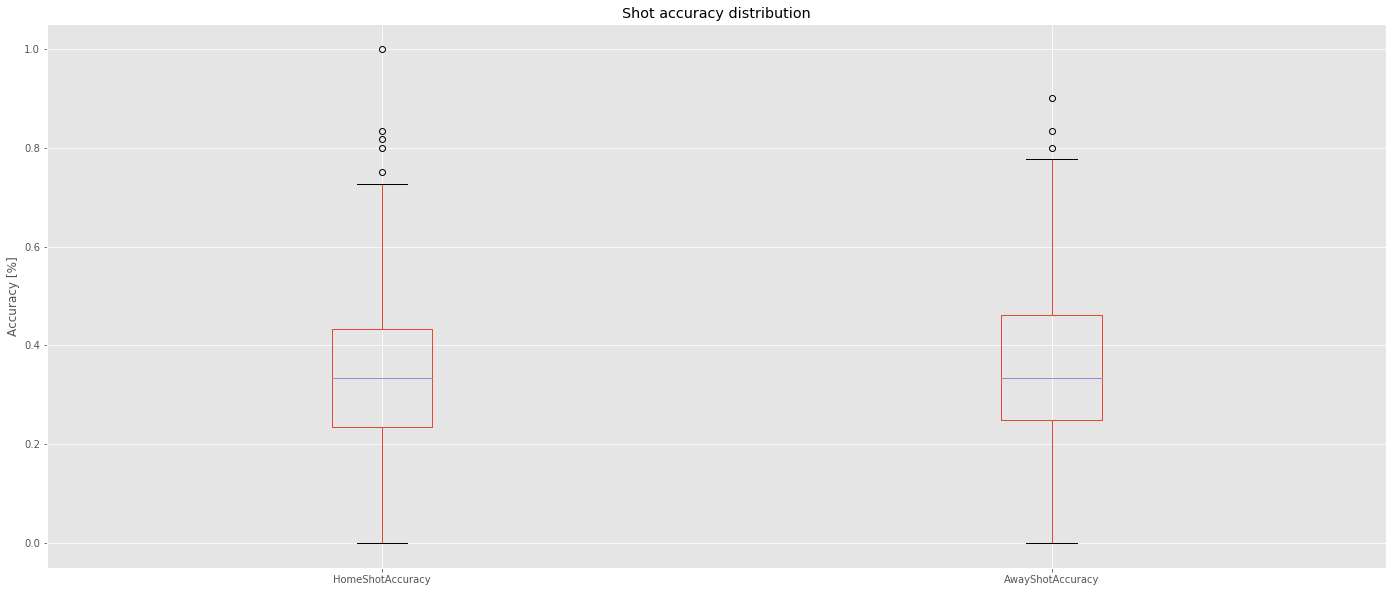

In [25]:
matches[['HomeShotAccuracy', 'AwayShotAccuracy']].plot.box(title='Shot accuracy distribution', figsize=(24, 10));
plt.ylabel('Accuracy [%]');

### 5. Vytvořte sloupeček `FullTimeWinner`, který obsahuje:

- `H`, pokud zvítězil `HomeTeam`
- `A`, pokud zvítězil `AwayTeam`
- `D`, pokud zápas skončil remízou

**Poznámka: Zatím neznáme apply, ale známe loc. Použijte tedy šikovně loc.** 

In [26]:
matches["FullTimeWinner"] = np.where(df['HomeShotsTarget'] > df['AwayShotsTarget'], "H", "A")
matches["FullTimeWinner"] = np.where(df['HomeShotsTarget'] == df['AwayShotsTarget'], "D", matches["FullTimeWinner"])
matches["FullTimeWinner"]

0      H
1      H
2      A
3      A
4      A
      ..
375    H
376    H
377    D
378    A
379    A
Name: FullTimeWinner, Length: 380, dtype: object

In [27]:
# TODO: Implement your solution.

### 6. Řekněme, že nás zajímá tým West Ham. Zjistětě, kolik průměrně vsítí gólů v domácích zápasech, které vyhraje a kolik v domácích zápasech, které prohraje.

In [28]:
# TODO: Implement your solution.

### 7. Jaký je median faulů, střel na branku a vstřelených gólů West Ham pro předchozích pět domácích zápasů? Jak se tyto statistiky vyvíjí v čase? Vizualizujte je.

In [29]:
# TODO: Implement your solution.

### 8. Je domácí prostředí výhodou?

**Poznámka: Součástí řešení je zamyslet se, jakou formou tuto otázku zodpovědět a jaké předpoklady si mohu dovolit udělat.** 

In [30]:
# TODO: Implement your solution.

### 9. Kolik který rozhodčí odpískal za sezónu průměrně faulů za zápas? Seřaďte je od těch nejpřísnějších.

In [31]:
# TODO: Implement your solution.

### 10. (BONUS) Budu víc vyhrávat, když budu víc faulovat?

In [32]:
# TODO: Implement your solution.